<a href="https://colab.research.google.com/github/Muhaiminul-Hasan/Learning-TensorFlow/blob/main/04_Learning_Tensorflow_CNN_without_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 3s 0us/step


In [ ]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [ ]:
base_dir       = os.path.join(zip_dir_base, 'cats_and_dogs_filtered')
train_dir      = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
print(base_dir)
print(train_dir)
print(train_cats_dir)
print(train_dogs_dir)
print(validation_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_va = len(os.listdir(validation_cats_dir))
num_dogs_va = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val   = num_cats_va + num_dogs_va

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_va)
print('total validation dog images:', num_dogs_va)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1.0/255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1.0/255)  # Generator for our validation data
print(type(train_image_generator))

<class 'keras.src.preprocessing.image.ImageDataGenerator'>


In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')
print(type(train_data_gen))

Found 2000 images belonging to 2 classes.
<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
  l = len(images_arr)
  fig, axes = plt.subplots(1, l, figsize=(4*l,2*l))
  # axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

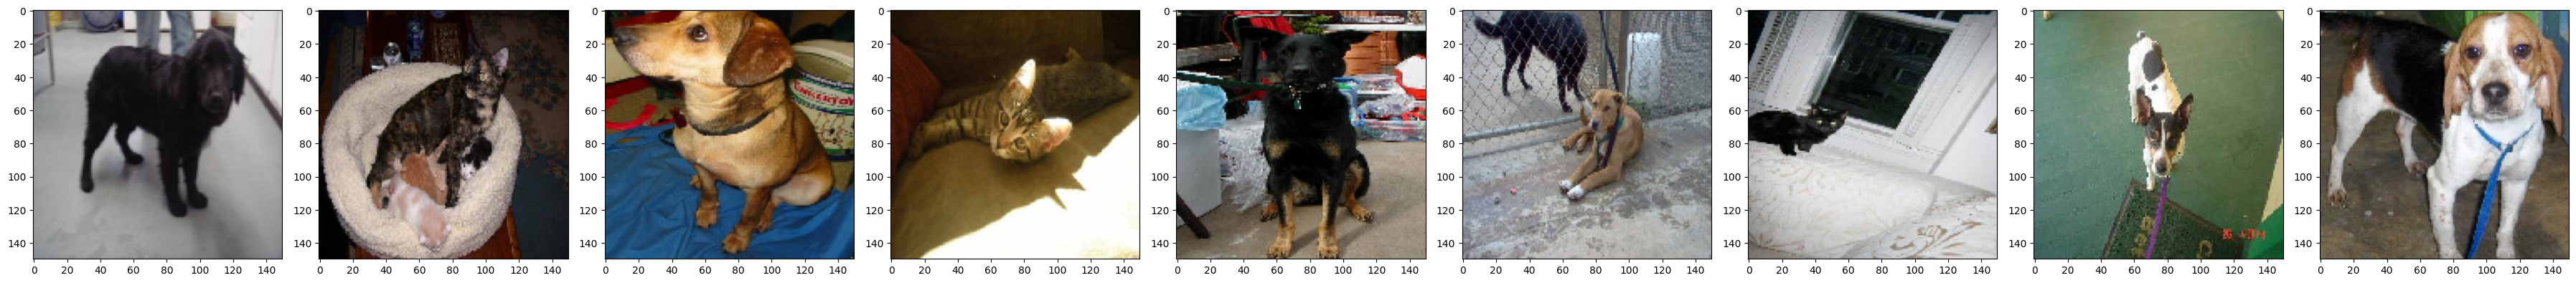

In [ ]:
plotImages(sample_training_images[0:10])  # Plot images 0-9

In [ ]:
model = tf.keras.models.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    tf.keras.layers.Flatten(),

    # Dense layers
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=2)  # Output layer with 2 units (binary classification)
])


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7ed1b94854e0>>

In [ ]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

<ipython-input-22-d70e0a339f06>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 19s 283ms/step - loss: 0.7067 - accuracy: 0.5035 - val_loss: 0.6831 - val_accuracy: 0.5010
Epoch 2/100
20/20 [==============================] - 6s 292ms/step - loss: 0.6850 - accuracy: 0.5590 - val_loss: 0.6959 - val_accuracy: 0.5170
Epoch 3/100
20/20 [==============================] - 5s 242ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6848 - val_accuracy: 0.5320
Epoch 4/100
20/20 [==============================] - 6s 289ms/step - loss: 0.6684 - accuracy: 0.5795 - val_loss: 0.6527 - val_accuracy: 0.5660
Epoch 5/100
20/20 [==============================] - 6s 289ms/step - loss: 0.6273 - accuracy: 0.6170 - val_loss: 0.6296 - val_accuracy: 0.6450
Epoch 6/100
20/20 [==============================] - 5s 243ms/step - loss: 0.5817 - accuracy: 0.6960 - val_loss: 0.6308 - val_accuracy: 0.6490
Epoch 7/100
20/20 [==============================] - 5s 250ms/step - loss: 0.5715 - accuracy: 0.7085 - val_loss: 0.5844 - val_accuracy: 0.689

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()